### 数据清洗与特征工程
## 思维导图
![数据清洗&特征工程](./思维导图/数据清洗&特征工程.png)

In [3]:
from visualML4learning import *
import pandas as pd
%matplotlib inline
from IPython.display import display

### 读取数据并创建特征工程对象

In [4]:
data = pd.read_excel('data/titanic.xlsx')
Data = FeatureEngineering(data)

### 查看头尾数据预览数据格式

In [4]:
display(Data.head(5))

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


通过观察

In [7]:
display(Data.tail(5))

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


### 数据统计，观察数据的方差以及分布

In [5]:
display(Data.describe())

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### 数据统计，检查是否有缺失值

In [8]:
display(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


None

### 绘制数据的条形图检查数据是否符合正态分布

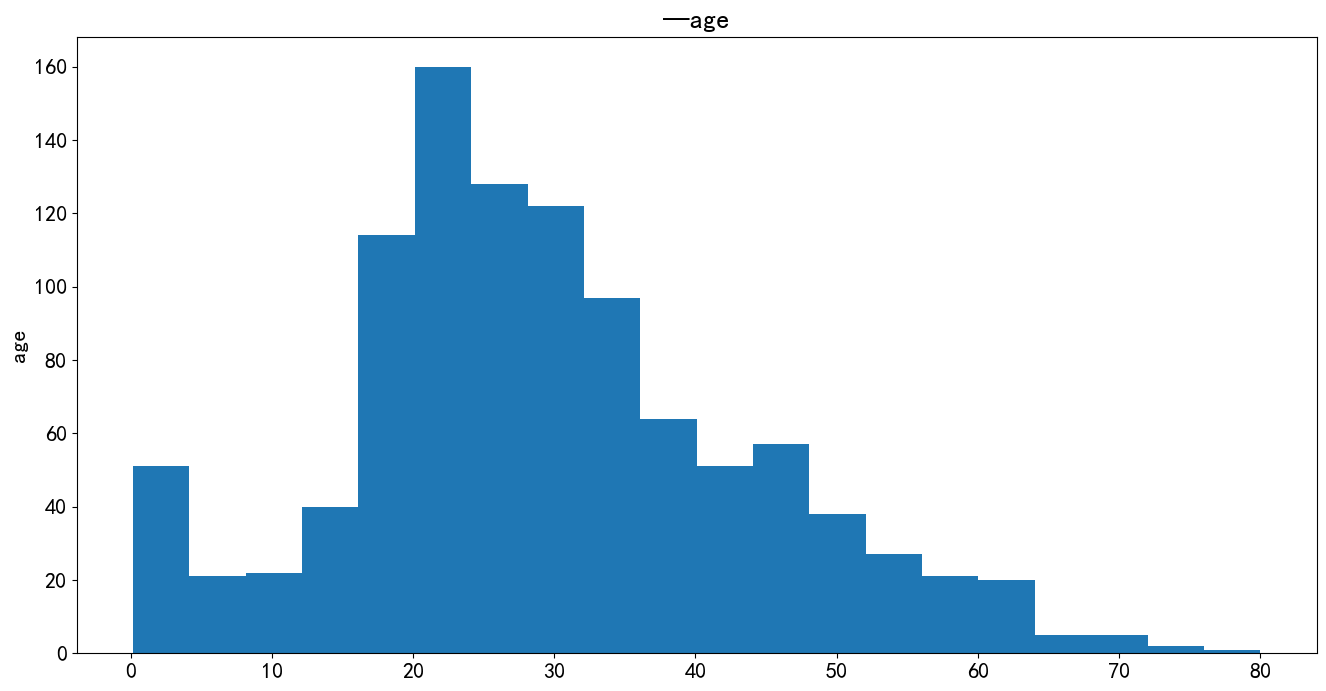

In [10]:
Data.set_x(['age'])
Data.column_hist()

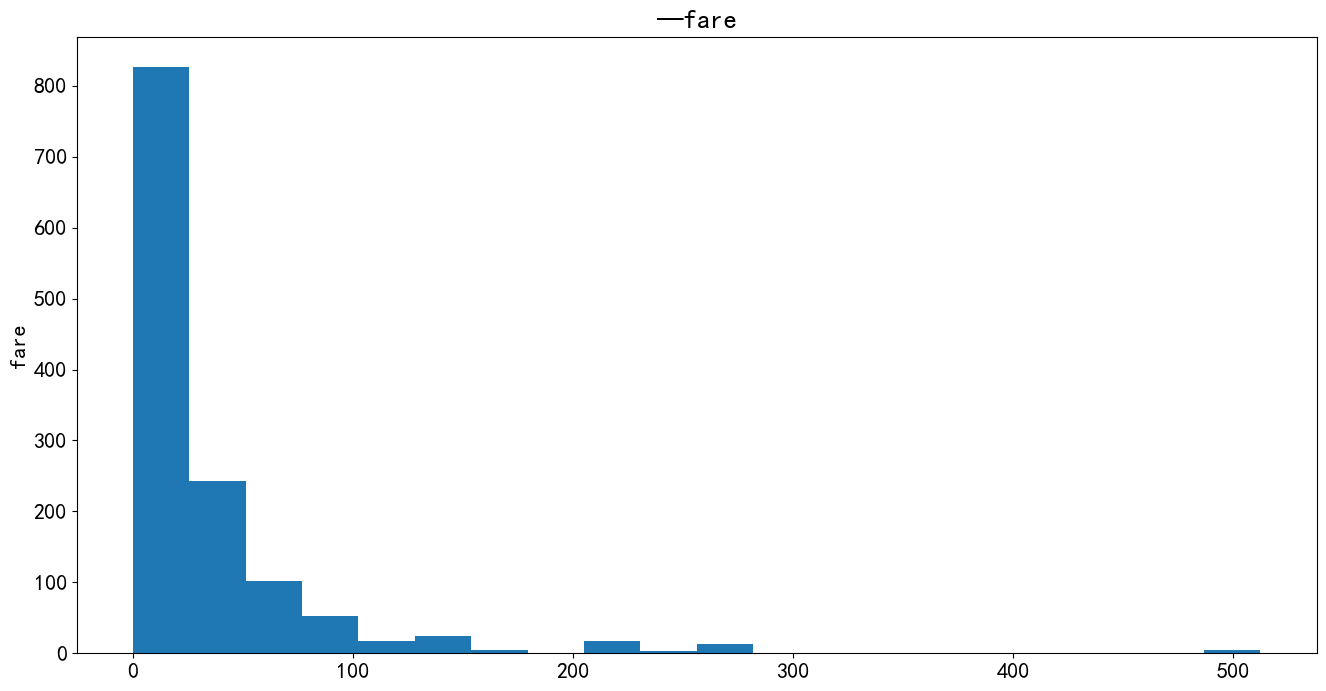

In [11]:
Data.set_x(['fare'])
Data.column_hist()

In [5]:
display(Data.count_null())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## 根据结果，发现age中和cabin中包含大量的缺失值

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

titanic_data = data

# 1. 处理缺失值
# ① 年龄使用平均值填充
imputer_age = SimpleImputer(strategy='mean')
titanic_data['age'] = imputer_age.fit_transform(titanic_data[['age']])

# ① 根据船票类别对fare进行平均填充
fare_means = titanic_data.groupby('pclass')['fare'].transform('mean')
titanic_data['fare'] = titanic_data['fare'].fillna(fare_means)

# ① 其他缺失值使用众数填充
mode_imputer = SimpleImputer(strategy='most_frequent')
cols_with_mode = ['embarked', 'home.dest']  # 可能需要使用众数填充的列
titanic_data[cols_with_mode] = mode_imputer.fit_transform(titanic_data[cols_with_mode])

# 2. 数据排除
# ② 不使用的列: 'name', 'cabin', 'boat', 'body', 'ticket'
columns_to_drop = ['name', 'cabin', 'boat', 'body', 'ticket']
titanic_data = titanic_data.drop(columns=columns_to_drop)

# 3. 哑变量处理
# ③ 对分类变量进行哑变量编码
encoder = OneHotEncoder(drop='first')  # 防止多重共线性
categorical_cols = ['sex', 'embarked']
# 使用 .toarray() 转换稀疏矩阵为密集矩阵，并正确获取特征名称
encoded_features = pd.DataFrame(encoder.fit_transform(titanic_data[categorical_cols]).toarray(), 
                                columns=encoder.get_feature_names_out())
titanic_data = titanic_data.drop(columns=categorical_cols)
titanic_data_encoded = pd.concat([titanic_data, encoded_features], axis=1)


# 划分数据为训练集和测试集
X = titanic_data_encoded.drop(columns=['survived', 'home.dest'])  # 排除目标变量和非数值列
y = titanic_data_encoded['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建并训练 softmax 回归模型
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 在测试集上进行预测 #
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率：", accuracy)
